# Example Notebook

This is an example notebook.

Modify / remove any of the below as suited for your needs

## Setup

In [1]:
# package install 
# !pip3 install flake8
# !pip3 install m2r
# !pip3 install nbformat
# !pip3 install numpy
# !pip3 install pandas
# !pip3 install pytest
# !pip3 install pytest-cookies
# !pip3 install pytest-cov
# !pip3 install sphinx
# !pip3 install spacy
# !pip3 install nltk
# !pip3 install wordcloud


# Standard python packages
import os
import sys
import string
# # for natural language processing: named entity recognition
# import spacy
# from spacy.displacy.render import EntityRenderer
# from IPython.core.display import display, HTML

# Other package imports
import numpy as np
import pandas as pd
import nltk


# if uising a Jupyter notebook, include:

# Visualization packages
from wordcloud import WordCloud
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

Setup some global settings and configuration

In [2]:
project_root = os.path.abspath(os.path.join(os.pardir, os.pardir))
data_folder = os.path.join(project_root, 'data')
data_folder_raw = os.path.join(data_folder, 'raw')
src_folder = os.path.join(project_root, 'src')
print(project_root)
print(data_folder)
print(data_folder_raw)
print(src_folder)

/notebooks
/notebooks/data
/notebooks/data/raw
/notebooks/src


This notebook uses the shared package however first we need to ensure it is available (otherwise you get an error about the module not being found). You can either run setup.py as discussed in the readme to install the package or modify the path to include the src folder.

In [3]:
# Explicitly set path so don't need to run setup.py - if we have multiple copies of 
# the code we would otherwise need to setup a seperate environment for each to
# ensure the code pointers are correct.
sys.path.insert(0, "../src")

from neraccidente import examplemodule

## Some Processing

## Appendix 1 - Environment Configuration

In [4]:
print (os.getcwd())
print (sys.version)
print (sys.executable)
print (sys.path)

/notebooks/ner-accidente/notebooks
3.8.2 (default, Jul 16 2020, 14:00:26) 
[GCC 9.3.0]
/usr/bin/python3
['../src', '/notebooks/ner-accidente/notebooks', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/usr/local/lib/python3.8/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.8/dist-packages/IPython/extensions', '/root/.ipython']


## Appendix 2 - Automated Tests

In [5]:
# Run tests within notebook
f_path = os.getcwd()
os.chdir(os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir)))

# Run pytest from the repository root
!pytest

os.chdir(f_path)

============================= test session starts ==============================
platform linux -- Python 3.8.2, pytest-5.4.3, py-1.9.0, pluggy-0.13.1
rootdir: /notebooks
plugins: cov-2.10.1, cookies-0.5.1
collected 5 items / 3 errors / 2 selected                                      

==================================== ERRORS ====================================
____________ ERROR collecting ner-accidente/tests/test_notebook.py _____________
import file mismatch:
imported module 'test_notebook' has this __file__ attribute:
  /notebooks/ml_basic/tests/test_notebook.py
which is not the same as the test file we want to collect:
  /notebooks/ner-accidente/tests/test_notebook.py
HINT: remove __pycache__ / .pyc files and/or use a unique basename for your test file modules
_ ERROR collecting ner-accidente/tests/neraccidente/examplemodule/test_add_value_to_numpy.py _
import file mismatch:
imported module 'test_add_value_to_numpy' has this __file__ attribute:
  /notebooks/ml_basic/tests/ml_b

In [6]:
# import our dataSet for analysis
path = os.path.join('../data', 'raw', 'ner - locatia accidente.csv')
# print(path)

df = pd.read_csv(path)
# print(f"Loaded {accident_data.shape[0]} samples.")

# select the only the rows that has marked words y=1
# df = df.loc[df['y'] == 1]


print(df)

      id  y                                               text  com
0      0  1  un sofer a tamponat o femeie pe trecerea pieto...  NaN
1      1  1  aseara jurul orei 2330 politia capitalei a fos...  NaN
2      6  1  accidentul s a intamplat aceasta dimineata pe ...  NaN
3      7  1  un pieton a fost spulberat mortal aseara un ta...  NaN
4     10  1  accidentul a avut loc sectorul botanica pe ||s...  NaN
..   ... ..                                                ...  ...
150  370  1  intersectia strazilor ||vadul|| ||lui|| ||voda...  NaN
151  371  1  un accident lant a avut loc aceasta dimineata ...  NaN
152  373  1  potrivt politei accidentul a avut loc acum o o...  NaN
153  375  1  accidentul s a produs astazi intersectia ||bul...  NaN
154  376  1  un barbat moarte dupa ce inima acestuia s a op...  NaN

[155 rows x 4 columns]


In [7]:
# TIME TO CLEAN THE TEXT
import spacy
from spacy import displacy
# install romanian models
# !python3 -m spacy download ro_core_news_lg

#Plot and image tools
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as mticker
import seaborn as sns
sns.set_style("dark")

nlp = spacy.load("ro_core_news_lg")
all_stopwords = nlp.Defaults.stop_words

# lower the text so that it all is in lowercase
df['text'] = df['text'].str.lower()

# remove all stop words that appear in the romanian text corpus
df['text_no_sw'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (all_stopwords)]))

In [8]:
# pass it a list for it to generate a word-cloud with all the words in that list
def generate_cloud(data_frame):
    all_words = ''
    for arg in data_frame:
        tokens = arg.split()  
        all_words += " ".join(tokens)+" "
#         print(all_words)
    wordcloud = WordCloud(width = 1000, height = 1000, background_color ='white', min_font_size = 10).generate(all_words) 
    # plot the WordCloud image                        
    plt.figure(figsize = (5, 5), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

# pass it a list so that it generate an (x,y) plot where x is the words and y is the occurance of that word
def plot_word_freq(text_to_plot, title='Placeholder title'):
    fd2 = nltk.FreqDist(word for word in text_to_plot)      
    x=[fd2.most_common(55)[i][0] for i in range(55)]
    y=[fd2.most_common(55)[i][1] for i in range(55)]
    #palette=sns.color_palette("PuBuGn_d",100)
    palette= sns.light_palette("crimson",100,reverse=True)
    plt.figure(figsize=(65,25))
    ax= sns.barplot(x, y, alpha=0.8,palette=palette)
    plt.title(title, fontsize=110)
    plt.ylabel('Occurrences', fontsize=190)
    plt.xlabel(' Word ', fontsize=110)
    #adding the text labels
    rects = ax.patches
    labels = y
    sns.set(font_scale=3)
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 1, label, ha='center', va='bottom')
        plt.xticks(rotation=90, fontsize=50)
    #plt.savefig('Toxic_Word_count1.png')    
    plt.show()
    
# pass it a dataframe column and it will go over them to extract all the entities that it has and displays them
def detect_entities_in_dataframe(dataframe):
    for sentence in dataframe:
        ## print named entities in phrases
        sentence_nlp = nlp(sentence)
        print([(word, word.ent_type_) for word in sentence_nlp if word.ent_type_])
        # # visualize named entities
        displacy.render(sentence_nlp, style='ent', jupyter=True)

# pass it 2 lists of words and it will create a new list with all the words that appear in both lists and how many times
def get_words_appearing_in_both(marked_words, unmarked_words):
    words_that_appear_in_both = []
    for word in unmarked_words:
        if word in marked_words:
            words_that_appear_in_both.append(word)
    return words_that_appear_in_both




def get_how_many_entities_and_non_entities_per_phrase(dataframe):
    all_entities = {}
    all_non_entities = {}
    # the start and end positions of the entities in pohrases 
    all_entities_positions = {}
    # Dic that will hold the number of words that are in "all_entities" and "all_non_entities"
    num_all_entities = {}
    num_all_non_entities = {}
    sentence_index = -1
    for sentence in dataframe:
        entities = []
        non_entities = []
        sentence_index += 1
        for i in sentence.split():
            i_processed = i.replace("|","")
            if "|" in i:
                entities.append(i_processed)
            else: 
                non_entities.append(i_processed)
#         print(f'IN ROW:{sentence_index} there are {len(entities)}={entities} entities in this phrase and {len(non_entities)}={non_entities} non_entities')
        
        all_entities[sentence_index] = entities
        all_non_entities[sentence_index] = non_entities
        
        num_all_entities[sentence_index] = int(len(entities))
        num_all_non_entities[sentence_index] = int(len(non_entities))
        
    return all_entities, all_non_entities, num_all_entities, num_all_non_entities

# print(all_entities)

aseara jurul orei 2330 politia capitalei a fost alertata despre inversarea unui automobil pe ||traseul|| ce duce ||spre|| ||localitatea|| ||cheltuitori|| soldat cu decesul unei persoane si altele trei traumatizate grav fata locului au intervenit grupa ope


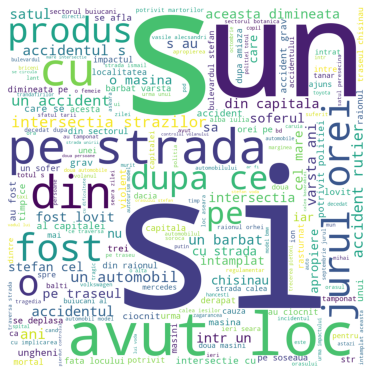

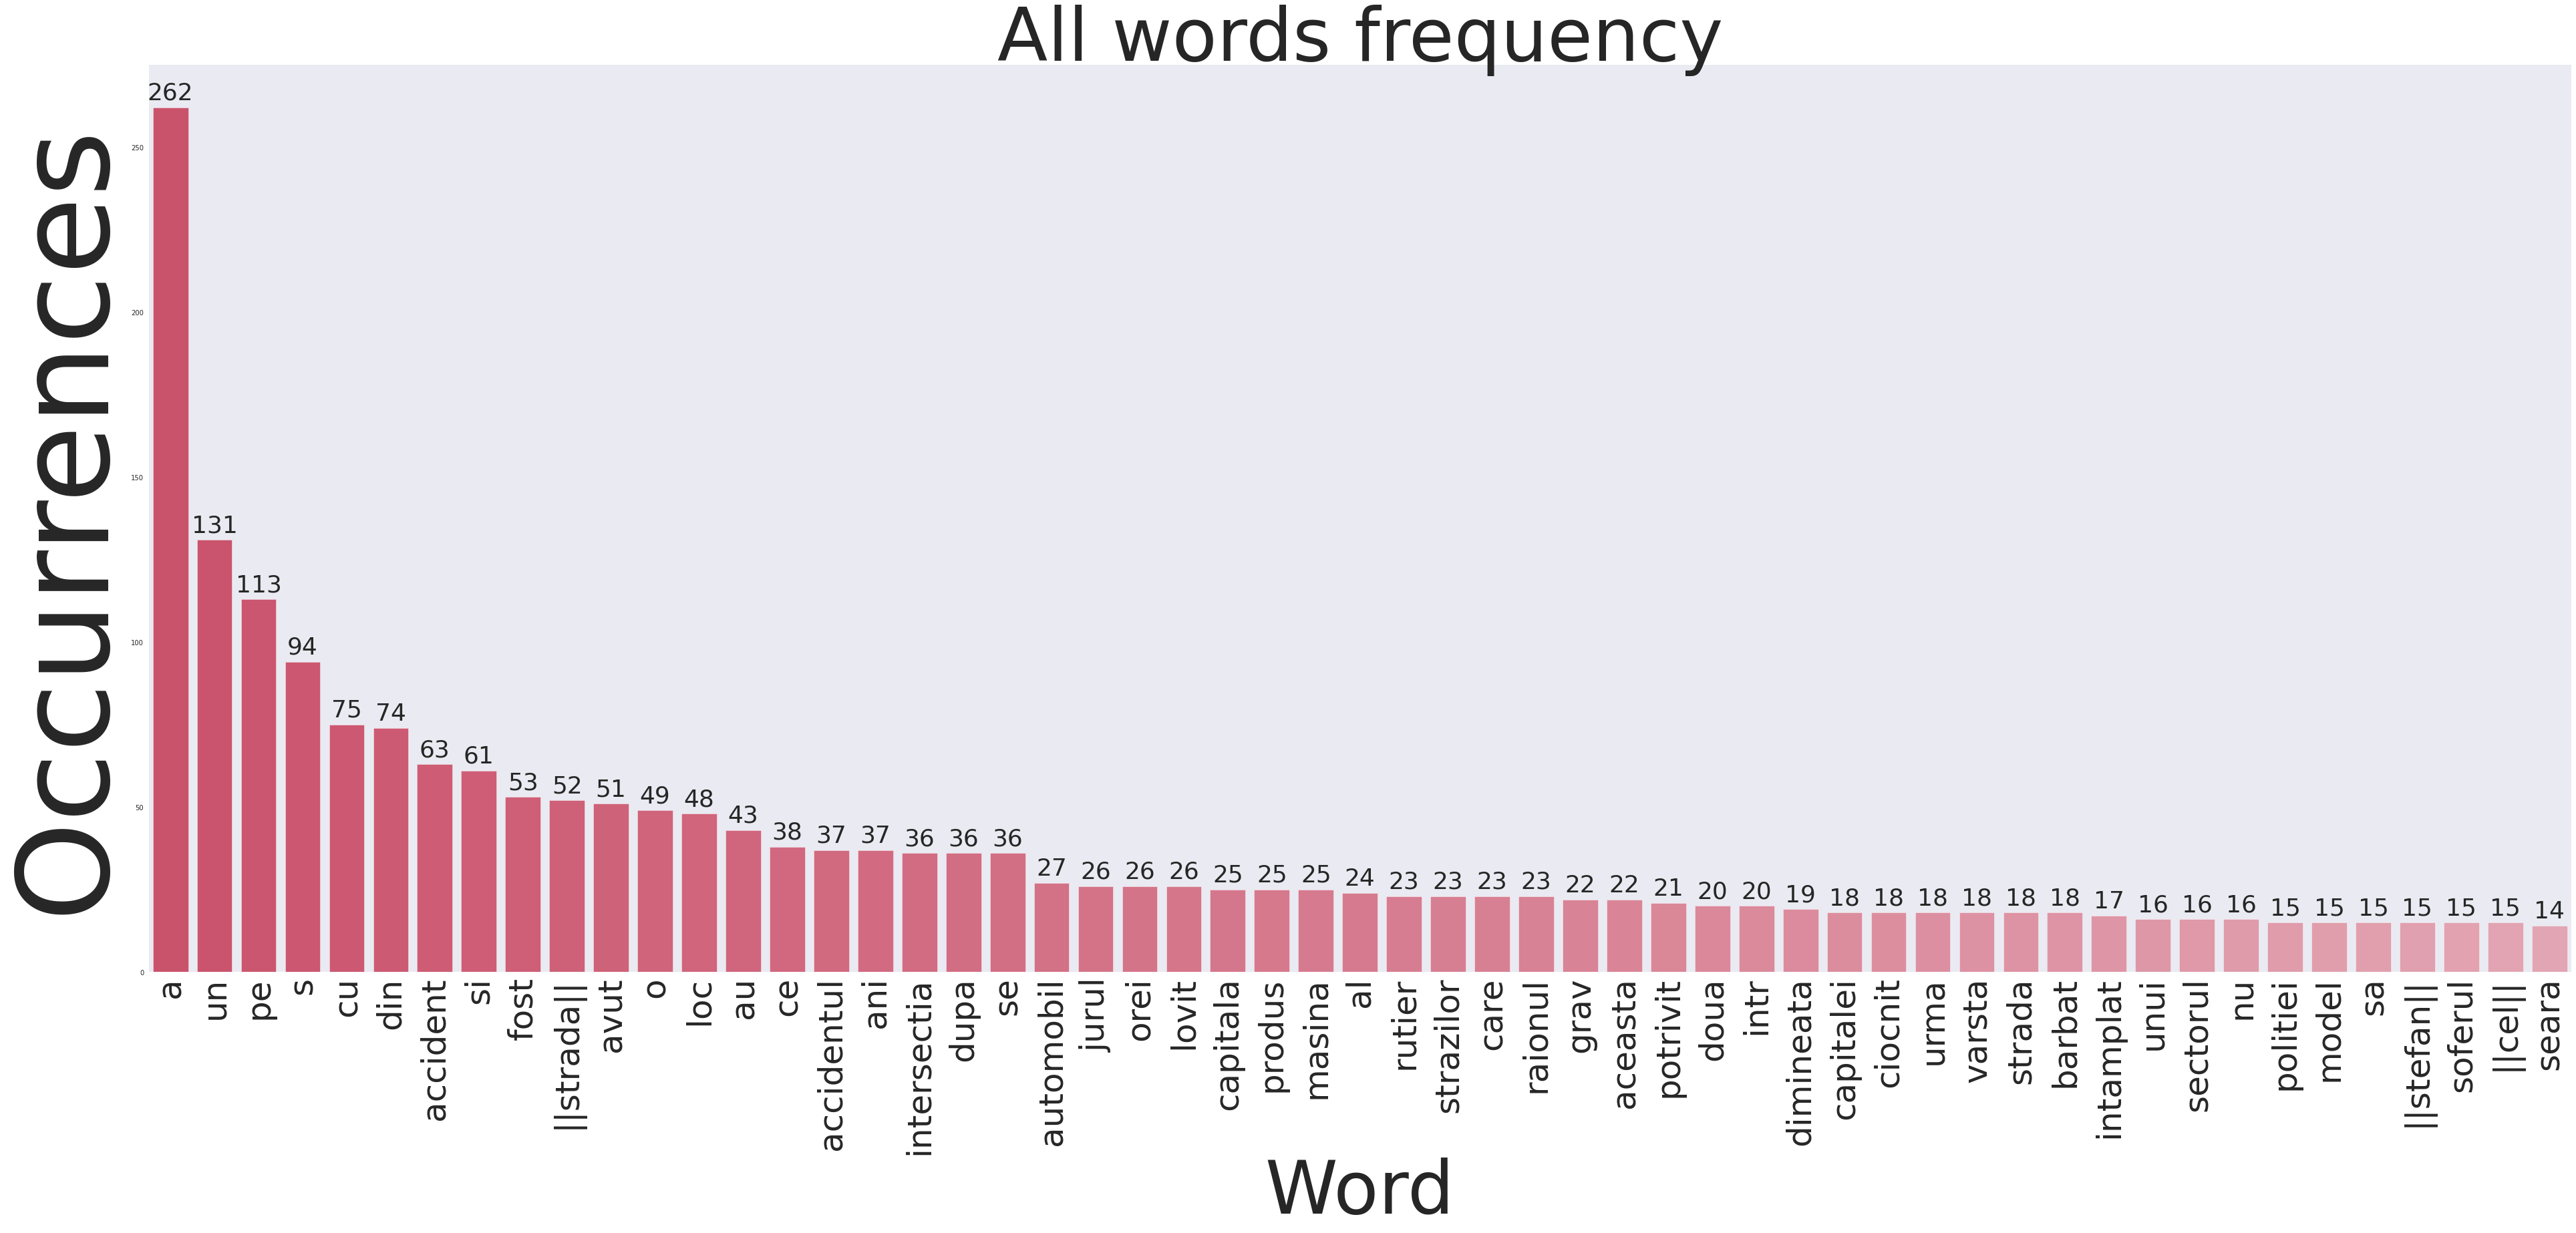

In [9]:
df['text'] = df['text'].str.replace('\xa0',' ')
#Data cleaning some symbols
# df['text'] = df['text'].re.sub('[!,*)/\@#%(&$_?„”.^]', '', row)
df['text'] = df['text'].str.replace(r'[!,*)/\"":@#%(&$_–?„”.^]', '')
df['text'] = df['text'].str.replace('[…]', '')
df['text'] = df['text'].str.replace('    ',' ')
df['text'] = df['text'].str.replace('  ',' ')
df['text'] = df['text'].str.replace('  ',' ')
print(df['text'][1])

all_corpus_text = []
for phrases in df["text"]:
    phrases = phrases.split(" ")
    for words in phrases:
        all_corpus_text.append(words)

generate_cloud(df["text"])          
plot_word_freq(all_corpus_text, title='All words frequency')

In [10]:
get_how_many_entities_and_non_entities_per_phrase(df['text'])
; # When you find this symbol ';' at the end of the cell, that cell wont print out the output of the functions

"# When you find this symbol ';' at the end of the cell, that cell wont print out the output of the functions"

# Parse and analyse the whole text corpus

# Parse and analyse the marked words from the text-corpus

# Add columns to our df from the values extracted from the 

530


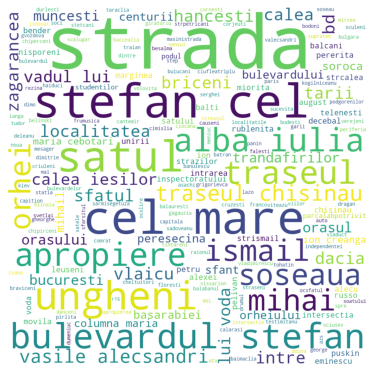

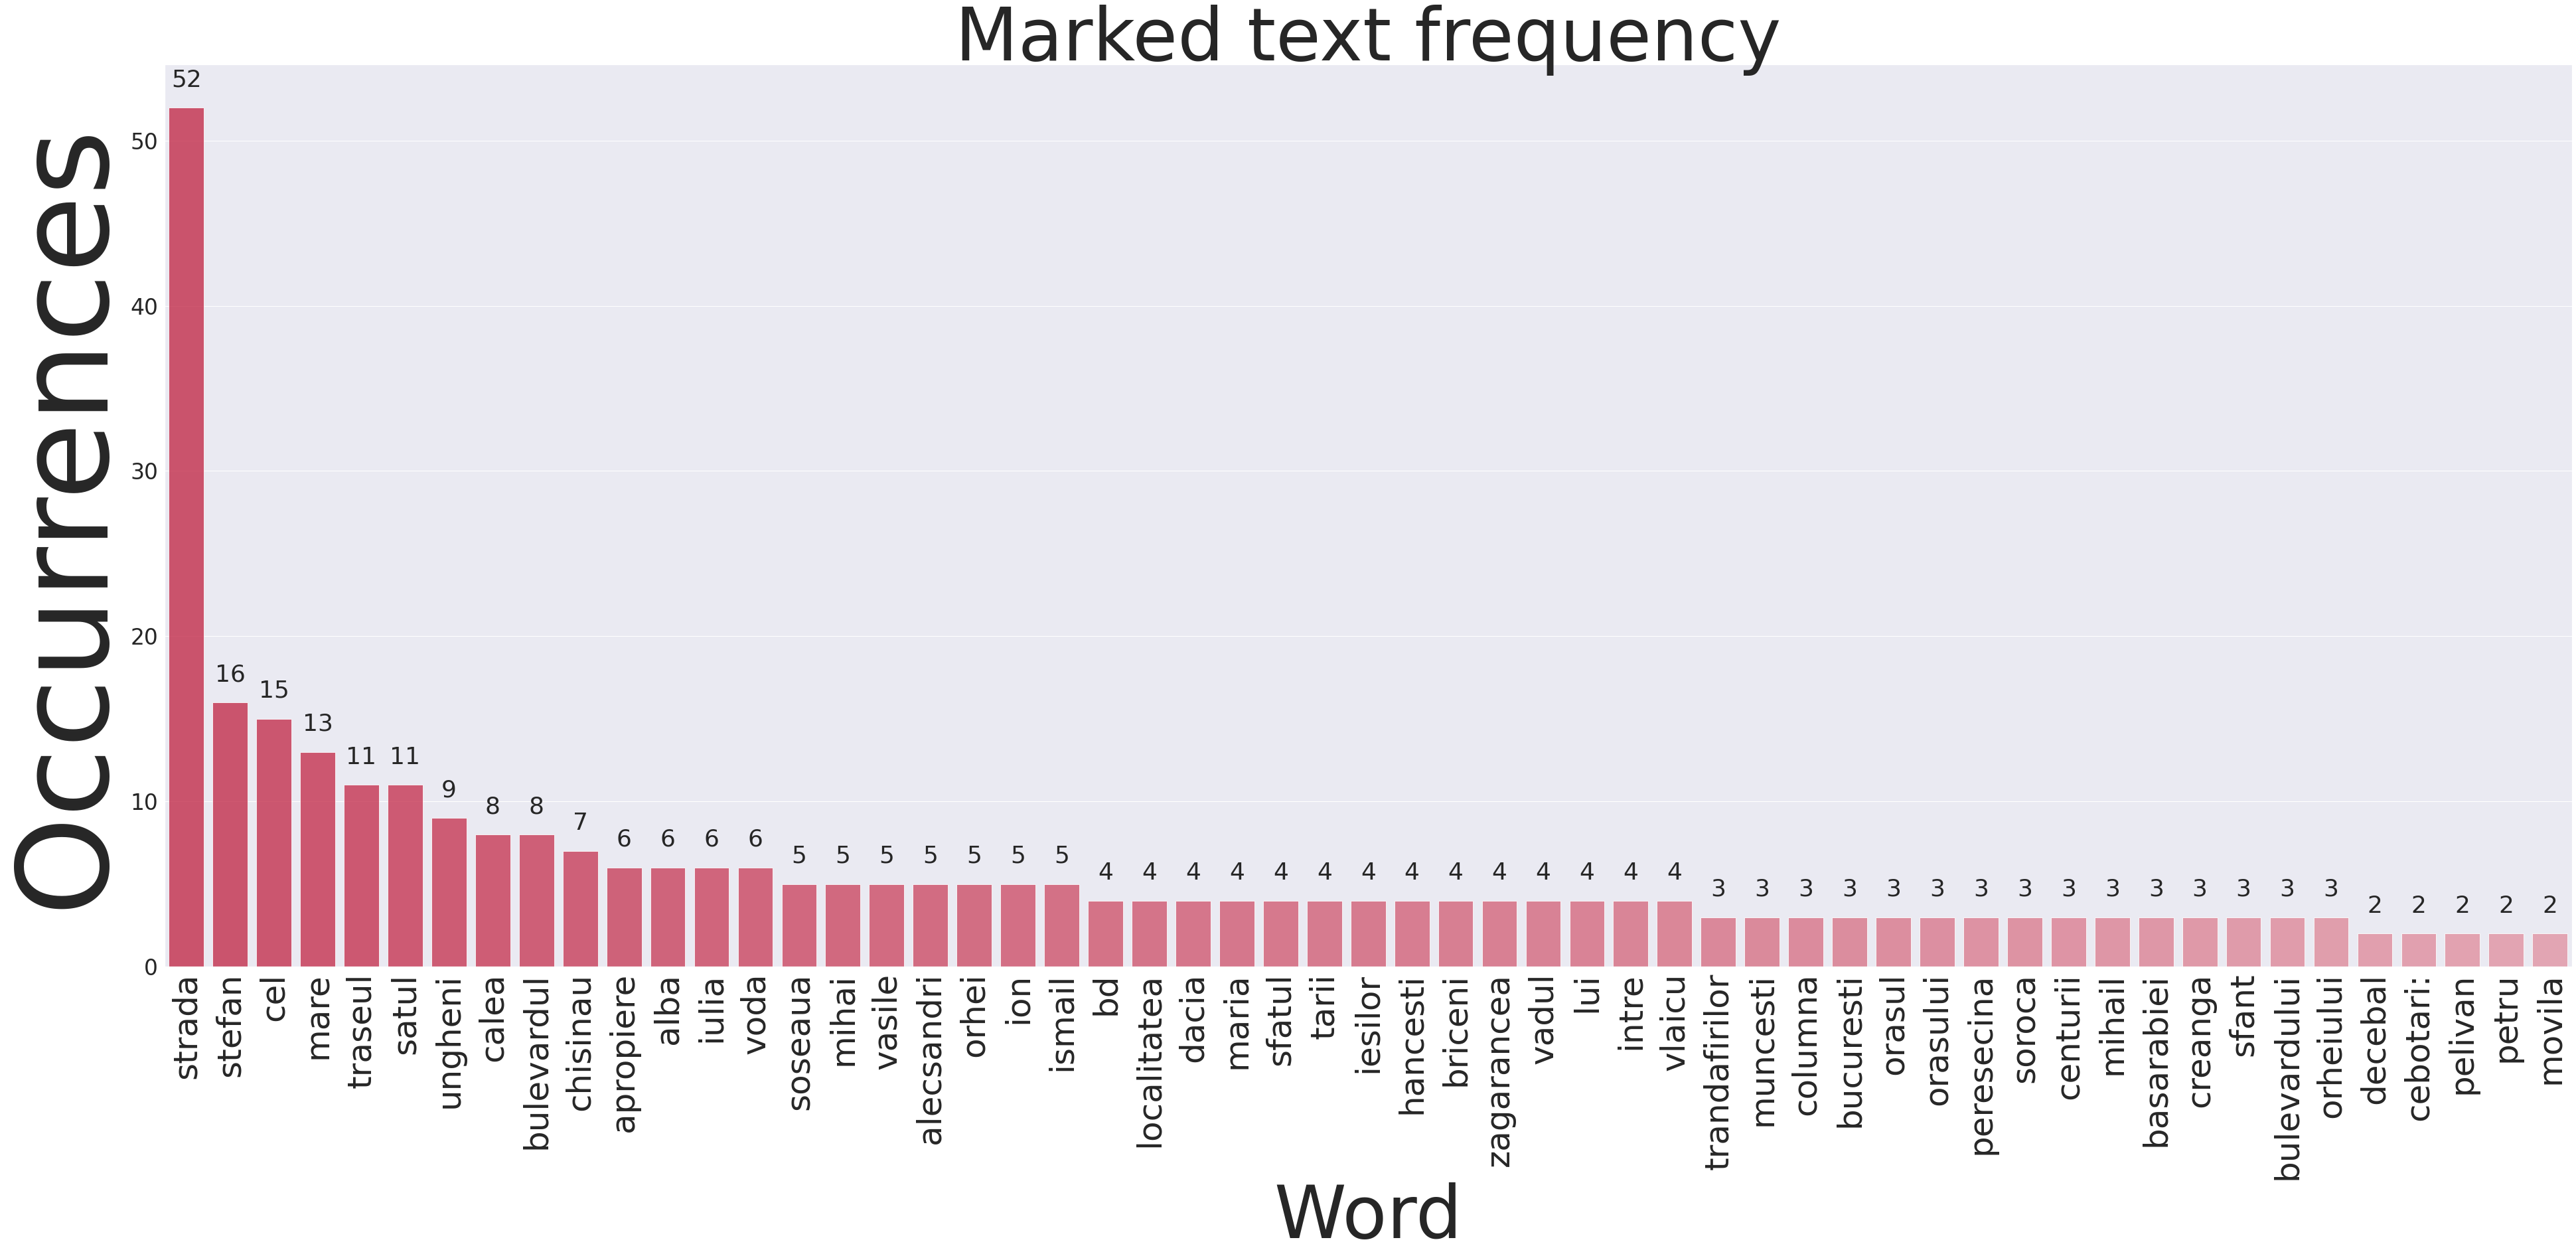

In [11]:
all_marked_text = []
all_unmarked_text = []
for phrases in df['text_no_sw']:
#     print('1' + phrases)
    phrases = phrases.split(" ")
    for words in phrases:
#         print(phrases)
        i_processed = words.replace("|","")
        if "|" in words:
            all_marked_text.append(i_processed)
        else:
            all_unmarked_text.append(words)

# Visualize text that has not been annotated    

print(len(all_marked_text))
generate_cloud(all_marked_text)
plot_word_freq(all_marked_text, title='Marked text frequency')
dict_all_entities, dict_all_non_enteties, dict_num_all_entities, dict_num_all_non_entities \
    = get_how_many_entities_and_non_entities_per_phrase(df['text_no_sw'])

# print(all_entities)
# print(all_non_entities)
# Add new columns to the dataframe

# Create column based on the index that is in the column
# df['all_enteties'] = df.index
# df['all_non_enteties'] = df.index
# df['num_all_enteties'] = df.index
# df['num_all_non_enteties'] = df.index

# Assign to the previously created column the dictionaries with the values
df['all_enteties'] = pd.Series(dict_all_entities)
df['all_non_enteties'] = pd.Series(dict_all_non_enteties)
df['num_all_enteties'] = pd.Series(dict_num_all_entities)
df['num_all_non_enteties'] = pd.Series(dict_num_all_non_entities)

# Parse and analyse the unmarked words from the text-corpus

2108


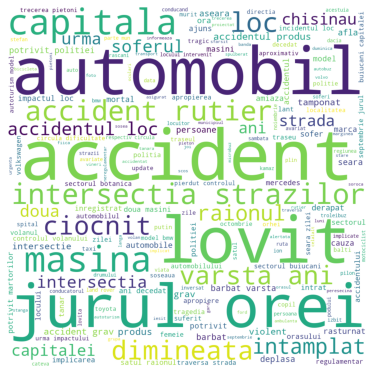

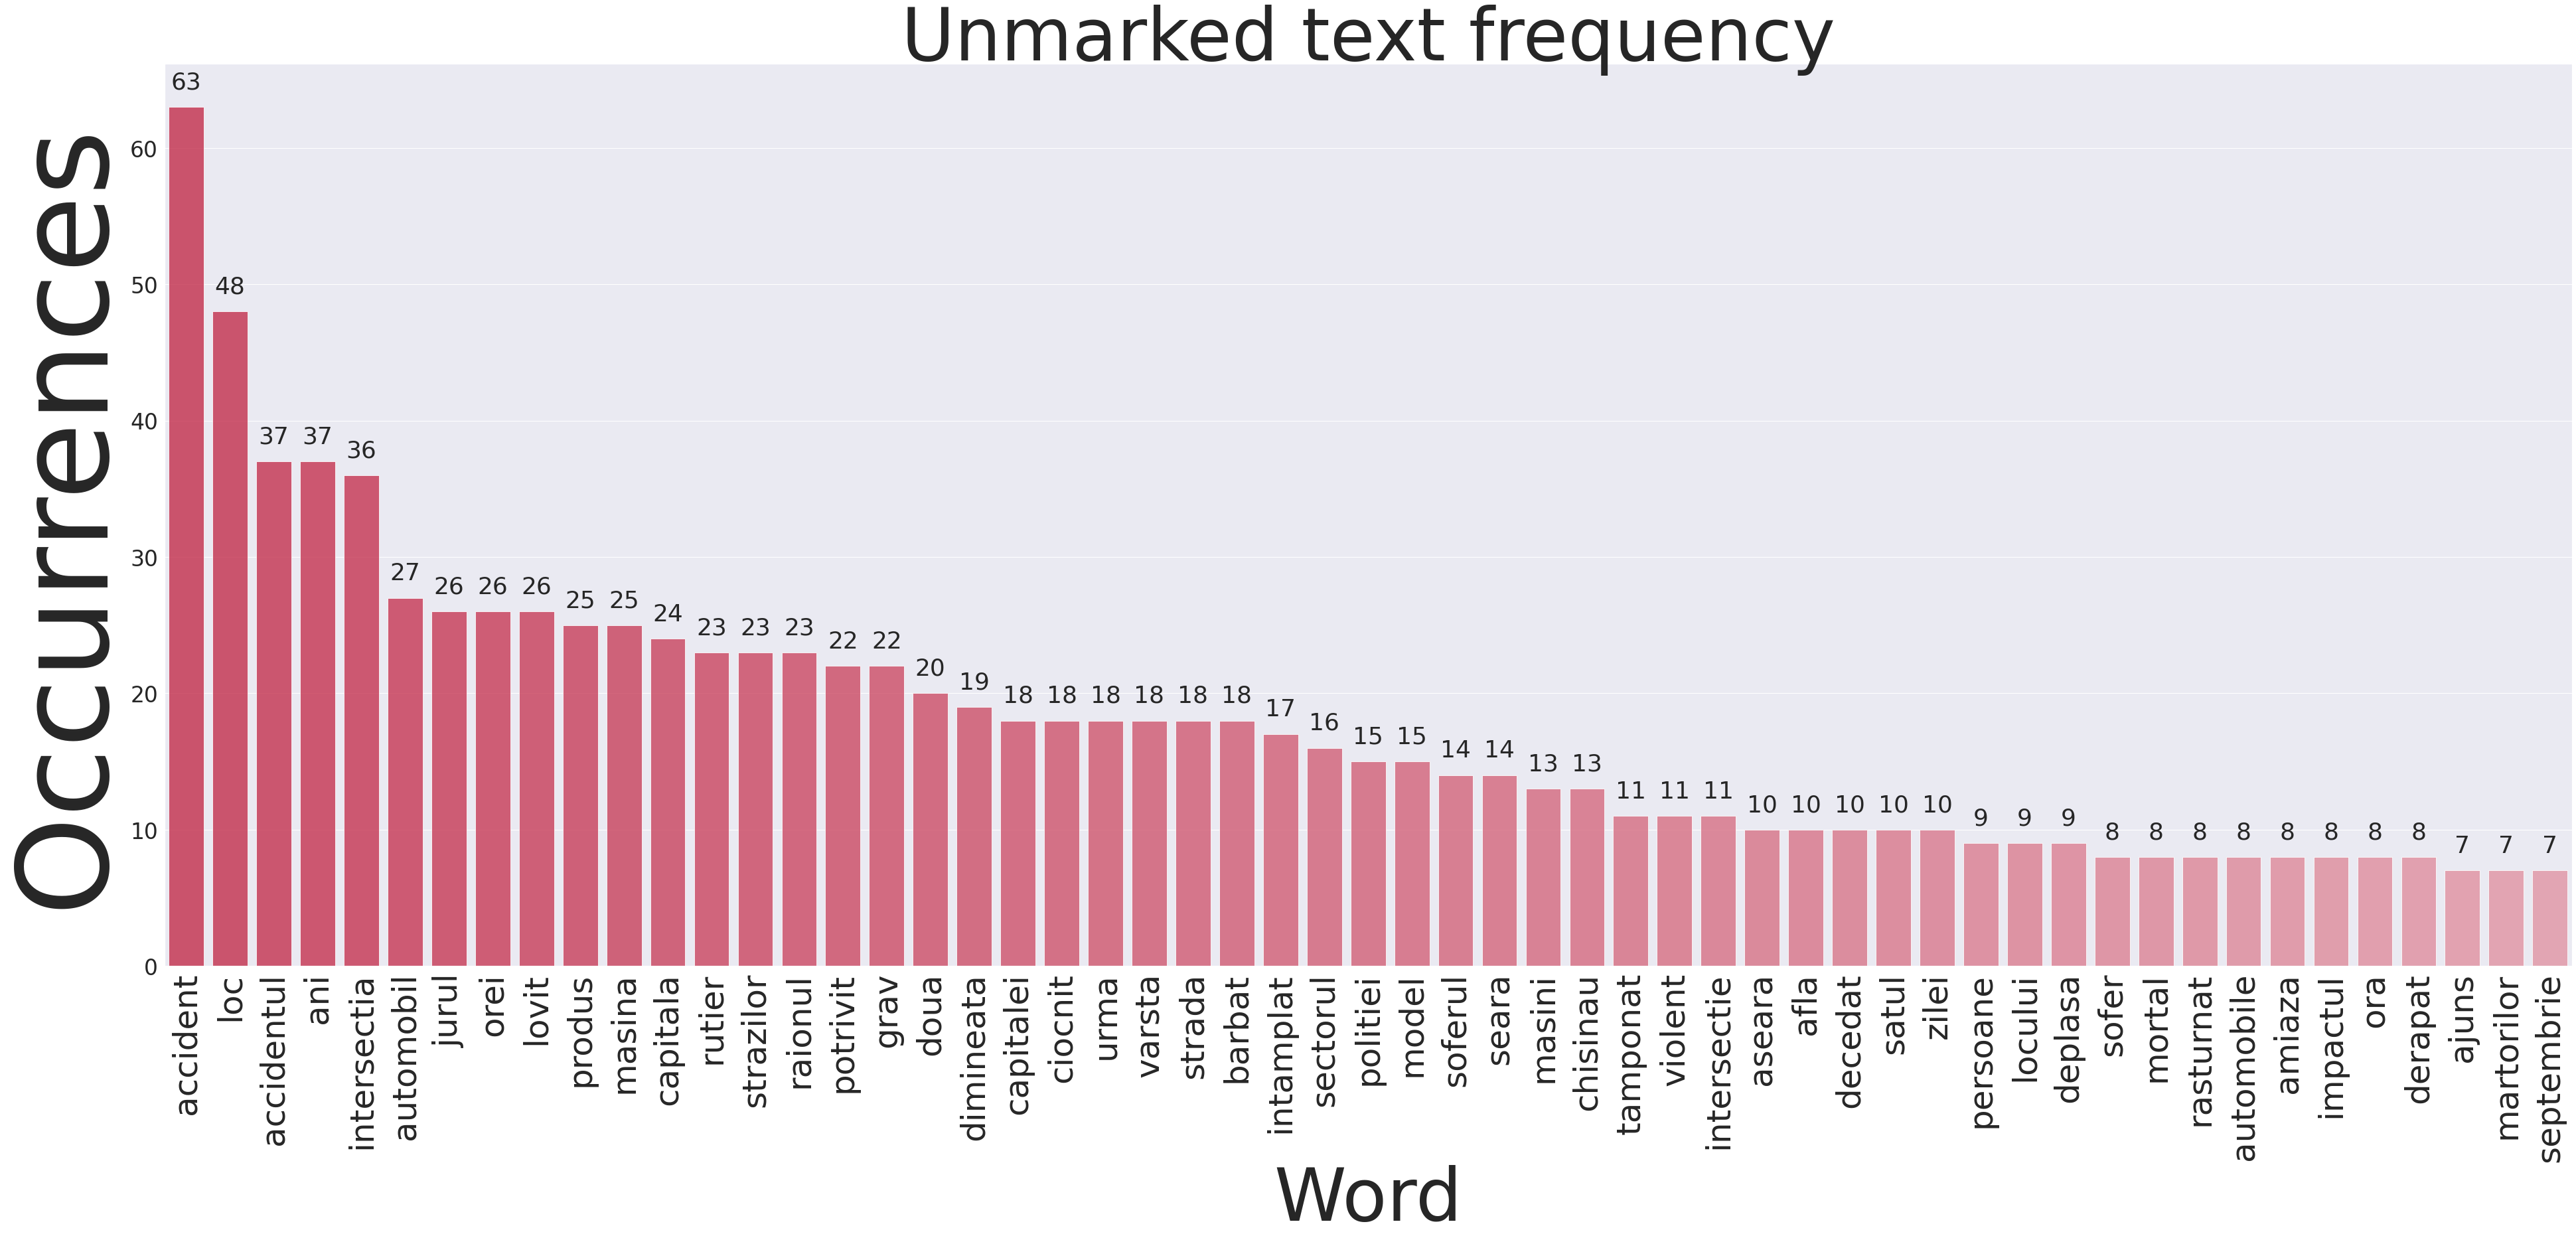

In [12]:
# Visualize text that has not been annotated
# print(all_unmarked_text)
print(len(all_unmarked_text))
generate_cloud(all_unmarked_text)
plot_word_freq(all_unmarked_text, title='Unmarked text frequency')

# Parse and analyse words from both marked and unmarked text-corspus

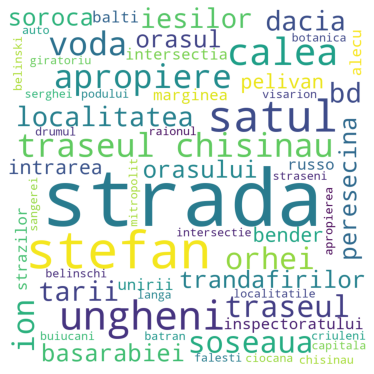

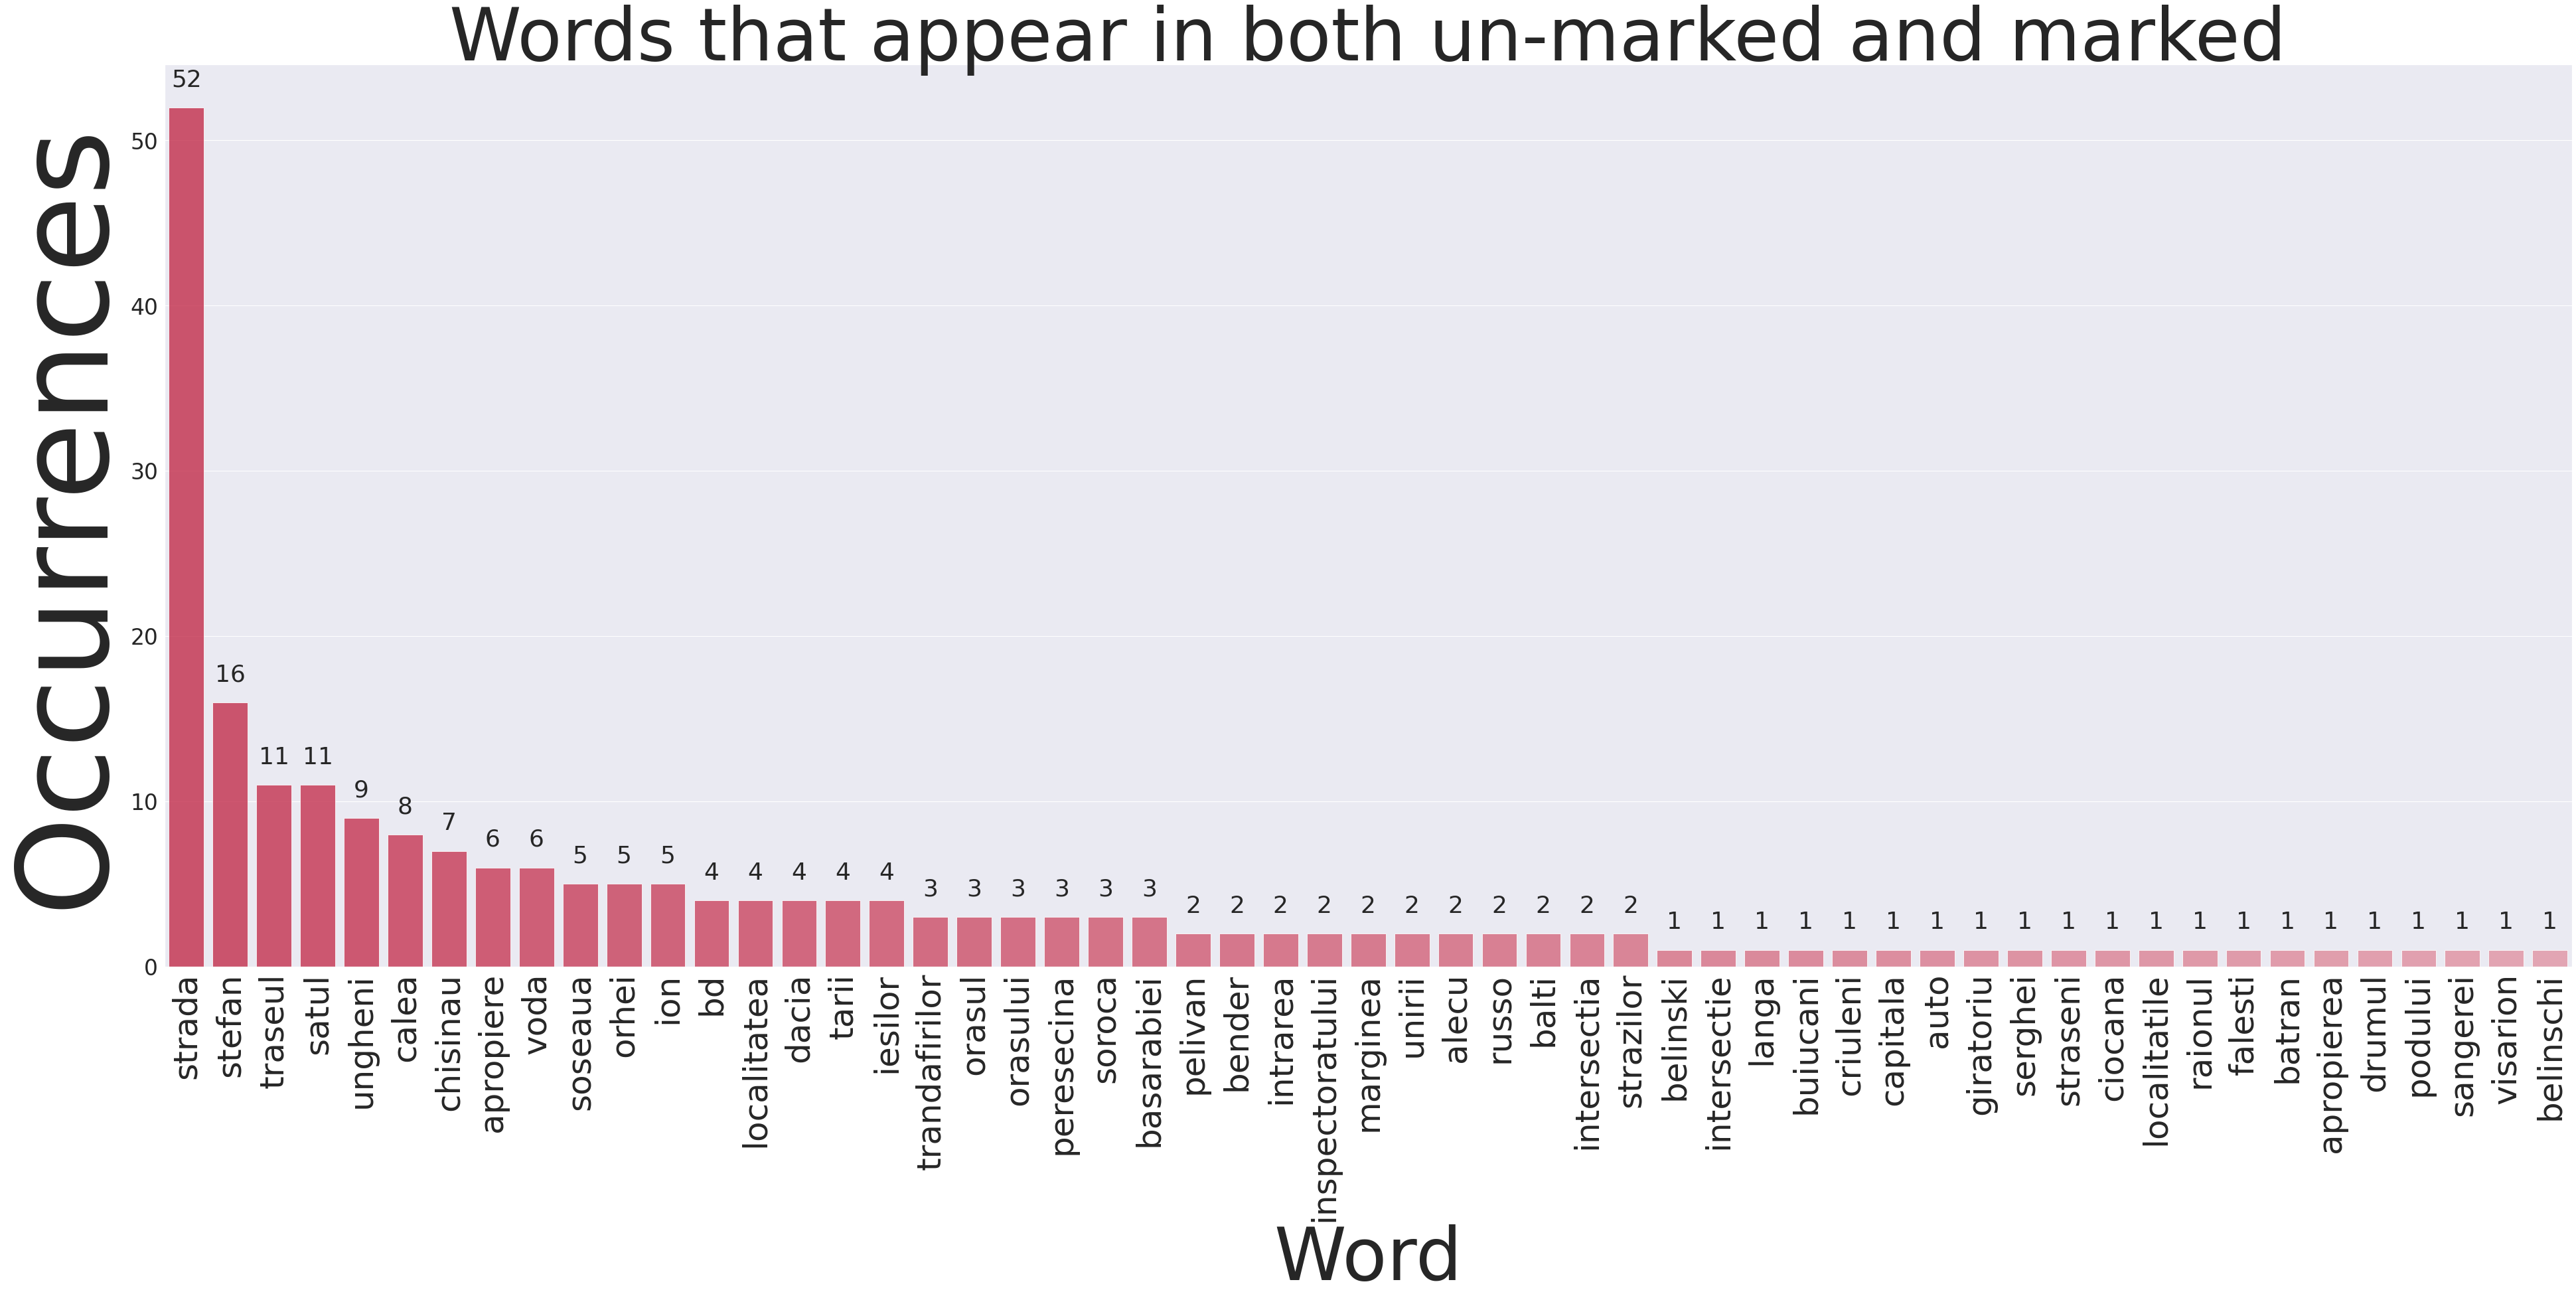

In [13]:
words_that_appear_in_both = get_words_appearing_in_both(all_unmarked_text,all_marked_text)
# print(words_that_appear_in_both)
generate_cloud(words_that_appear_in_both)
plot_word_freq(words_that_appear_in_both, title='Words that appear in both un-marked and marked')

In [14]:
# TIME TO DETECT ENTITIES AND CLEAN THE TEXT
import spacy
from spacy import displacy

# install romanian models
# !python3 -m spacy download ro_core_news_lg

nlp = spacy.load("ro_core_news_lg")
all_stopwords = nlp.Defaults.stop_words


# lower the text so that it all is in lowercase
df['text'] = df['text'].str.lower()
# remove all stop words that appear in the romanian text corpus || dont remove for training purpouses
df['text_no_sw'] = df['text']#.apply(lambda x: ' '.join([word for word in x.split() if word not in (all_stopwords)]))

In [15]:
df['text_no_sw_no_bars'] = df['text_no_sw'].str.replace('|','')

df['text_no_sw_no_bars'][0]

'un sofer a tamponat o femeie pe trecerea pietoni intersectia bd decebal cu strada trandafirilor potrivit politiei persoana traumata a fost luata o ambulanta si transportata urgenta spital'

## Iterate over all rows in "df['text_no_sw_no_bars']" and highlight the entities

In [16]:
## TIME TO DETECT ENTITIES 
detect_entities_in_dataframe(df['text_no_sw_no_bars'].head())

[(sofer, 'PERSON'), (femeie, 'PERSON'), (bd, 'LOC'), (decebal, 'LOC'), (strada, 'LOC'), (trandafirilor, 'LOC'), (ambulanta, 'FACILITY'), (spital, 'FACILITY')]


[(aseara, 'DATETIME'), (jurul, 'DATETIME'), (orei, 'DATETIME'), (2330, 'NUMERIC_VALUE'), (alertata, 'ORGANIZATION'), (automobil, 'PRODUCT'), (cheltuitori, 'PERSON'), (persoane, 'PERSON'), (trei, 'NUMERIC_VALUE')]


[(soseaua, 'LOC'), (muncesti, 'LOC')]


[(pieton, 'PERSON'), (aseara, 'DATETIME'), (taxi, 'PRODUCT'), (soseaua, 'FACILITY'), (muncesti, 'FACILITY')]


[(sectorul, 'LOC'), (botanica, 'LOC'), (strada, 'LOC'), (trandafirilor, 'LOC'), (jurul, 'LOC'), (orei, 'LOC'), (2000, 'LOC')]


In [17]:
nlp = spacy.load("ro_core_news_lg")
nlp.pipe_names

['tagger', 'parser', 'ner']

In [18]:
# doc = nlp("impactul a avut loc intersectia strazii 31 august cu strada ismail")
doc = nlp("accidentul s a intamplat aceasta dimineata apropiere comunei tohatin")

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

tohatin 61 68 GPE


In [19]:
import re

# cleaned_data= df['text_no_sw'][13]
# split = cleaned_data.split(" ")
# cleaned_data_no_bars = cleaned_data.replace("|","")
# # Check the text that gooing to be transformed
# print(cleaned_data)
# print(30*"---")
# print(cleaned_data_no_bars)
# print(30*"---")

def change_to_training_format(passed_data):
    last_len = 0
    position = []
    entities = []

    for i in passed_data:
        i_processed = i.replace("||","")
        if "|" in i:
            start = last_len
            finish = last_len + len(i_processed)
            last_len += len(i_processed) + 1

            entities.append((start, finish, 'LOC_ACCIDENT'))
            position.append(start)
            position.append(finish)
        else:
            last_len += len(i_processed) + 1
    return entities

# this dict will be populated with "entities_positions_dict" for each row
holding_dict = {}
row_index = 0
for row in df['text_no_sw']:
    # all the enteties per row will be held in this dic 
    entities_positions_dict = {}
    
    split = row.split(" ")
    
    #Data cleaning some symbols
    cleaned_data_no_bars = row
    cleaned_data_no_bars = cleaned_data_no_bars.replace('||', " ")
    cleaned_data_no_bars = cleaned_data_no_bars.replace('   ', " ")
    cleaned_data_no_bars = cleaned_data_no_bars.replace('  ', " ")
    
    entities_position = change_to_training_format(split)
    # Append
    entities_positions_dict['entities'] = entities_position
    holding_dict[row_index] = entities_positions_dict
    row_index +=1

## Insert our data in spacy training format into the df column 'Training_format'

if 'Entities_position' in df.columns:
    df = df.drop(columns='Entities_position')


# Assign to the previously created column the dictionaries with the values
df['Entities_position'] = pd.Series(holding_dict)

df.head()

# df.to_csv()

,id,y,text,com,text_no_sw,all_enteties,all_non_enteties,num_all_enteties,num_all_non_enteties,text_no_sw_no_bars,Entities_position
0,0,1,un sofer a tamponat o femeie pe trecerea pieto...,NaN,un sofer a tamponat o femeie pe trecerea pieto...,"[bd, decebal, strada, trandafirilor]","[sofer, tamponat, femeie, trecerea, pietoni, i...",4,15,un sofer a tamponat o femeie pe trecerea pieto...,"{'entities': [(61, 63, 'LOC_ACCIDENT'), (64, 7..."
1,1,1,aseara jurul orei 2330 politia capitalei a fos...,NaN,aseara jurul orei 2330 politia capitalei a fos...,"[traseul, spre, localitatea, cheltuitori]","[aseara, jurul, orei, 2330, politia, capitalei...",4,20,aseara jurul orei 2330 politia capitalei a fos...,"{'entities': [(93, 100, 'LOC_ACCIDENT'), (109,..."
2,6,1,accidentul s a intamplat aceasta dimineata pe ...,NaN,accidentul s a intamplat aceasta dimineata pe ...,"[soseaua, muncesti]","[accidentul, intamplat, dimineata, capitala]",2,4,accidentul s a intamplat aceasta dimineata pe ...,"{'entities': [(46, 53, 'LOC_ACCIDENT'), (54, 6..."
3,7,1,un pieton a fost spulberat mortal aseara un ta...,NaN,un pieton a fost spulberat mortal aseara un ta...,"[soseaua, muncesti]","[pieton, spulberat, mortal, aseara, taxi, acci...",2,11,un pieton a fost spulberat mortal aseara un ta...,"{'entities': [(74, 81, 'LOC_ACCIDENT'), (82, 9..."
4,10,1,accidentul a avut loc sectorul botanica pe ||s...,NaN,accidentul a avut loc sectorul botanica pe ||s...,"[strada, trandafirilor]","[accidentul, loc, sectorul, botanica, jurul, o...",2,7,accidentul a avut loc sectorul botanica pe str...,"{'entities': [(43, 49, 'LOC_ACCIDENT'), (50, 6..."


In [20]:
row1_text = df['text_no_sw_no_bars'][1]
print(type(row1_text))
print(row1_text)

enteties_text = df['all_enteties'][1]
Entities_position_text = df['Entities_position'][1]

print(type(enteties_text))
print(enteties_text)
print(type(Entities_position_text))
print((Entities_position_text))

<class 'str'>
aseara jurul orei 2330 politia capitalei a fost alertata despre inversarea unui automobil pe traseul ce duce spre localitatea cheltuitori soldat cu decesul unei persoane si altele trei traumatizate grav fata locului au intervenit grupa ope
<class 'list'>
['traseul', 'spre', 'localitatea', 'cheltuitori']
<class 'dict'>
{'entities': [(93, 100, 'LOC_ACCIDENT'), (109, 113, 'LOC_ACCIDENT'), (114, 125, 'LOC_ACCIDENT'), (126, 137, 'LOC_ACCIDENT')]}


In [21]:
## training data WORK-IN-PROGRESS
# list_dos = ('bd decebal cu strada trandafirilor potrivit',{'entities':[(61, 63, 'LOC'), (64, 71, 'LOC')]})
df = df.loc[df['y'] == 1]
records = df[['text_no_sw_no_bars','Entities_position']]
records = df[['text_no_sw_no_bars','Entities_position']].to_records(index=False)
result = list(records)

Create a pandas data-frame
-------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
|Phrase                 |Key_words            |How_many_keywords |          How_many_non_keywords          |
|ozdova raionul floresti|['ozdova','floresti']|len([Key_words])=2|len(WORDS_IN_Phrase) - len([Key_words])=1|

In [22]:
TRAIN_DATA = result


len(TRAIN_DATA)
# 100 training
training_data = TRAIN_DATA[0:100]
# 53 testing
testing_data = TRAIN_DATA[100:153]

In [31]:
# BEGIN TRAINGING THE NEW MODEL


#!/usr/bin/env python
# coding: utf8
"""Example of training spaCy's named entity recognizer, starting off with an
existing model or a blank model.

For more details, see the documentation:
* Training: https://spacy.io/usage/training
* NER: https://spacy.io/usage/linguistic-features#named-entities

Compatible with: spaCy v2.0.0+
Last tested with: v2.2.4
"""
from __future__ import unicode_literals, print_function

import random
import warnings
from pathlib import Path
import spacy
from spacy.util import minibatch, compounding


## training data WORK-IN-PROGRESS
TRAIN_DATA = training_data


def main(model=None, output_dir=None, n_iter=100):
    # Use built-in "ner" pipeline components
    ner = nlp.get_pipe("ner")

    # add labels
    for _, annotations in TRAIN_DATA:
        for ent in annotations.get("entities"):
            ner.add_label(ent[2])

    print("Started Training")
    # get names of other pipes to disable them during training
    pipe_exceptions = ["ner", "trf_wordpiecer", "trf_tok2vec"]
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]
    # only train NER
    with nlp.disable_pipes(*other_pipes), warnings.catch_warnings():
        # show warnings for misaligned entity spans once
        warnings.filterwarnings("once", category=UserWarning, module='spacy')

        # reset and initialize the weights randomly – but only if we're
        # training a new model
        if model is None:
            nlp.begin_training()
        for itn in range(n_iter):
            random.shuffle(TRAIN_DATA)
            losses = {}
            # batch up the examples using spaCy's minibatch
            batches = minibatch(TRAIN_DATA, size=compounding(4.0, 32.0, 1.001))
            for batch in batches:
                texts, annotations = zip(*batch)
                nlp.update(
                    texts,  # batch of texts
                    annotations,  # batch of annotations
                    drop=0.5,  # dropout - make it harder to memorise data
                    losses=losses,
                )
            print("Losses", losses)

    # test the trained model
    for text, _ in TRAIN_DATA:
        doc = nlp(text)
#         print("Entities", [(ent.text, ent.label_) for ent in doc.ents])
#         print("Tokens", [(t.text, t.ent_type_, t.ent_iob) for t in doc])

    # save model to output directory
    if output_dir is not None:
        output_dir = Path(output_dir)
        if not output_dir.exists():
            output_dir.mkdir()
        nlp.to_disk(output_dir)
        print("Saved model to", output_dir)

if __name__ == "__main__":
    main(model='ro_core_news_lg', output_dir='../src/models/', n_iter=100)
#     plac.call(main)

    # Expected output:
    # Entities [('Shaka Khan', 'PERSON')]
    # Tokens [('Who', '', 2), ('is', '', 2), ('Shaka', 'PERSON', 3),
    # ('Khan', 'PERSON', 1), ('?', '', 2)]
    # Entities [('London', 'LOC'), ('Berlin', 'LOC')]
    # Tokens [('I', '', 2), ('like', '', 2), ('London', 'LOC', 3),
    # ('and', '', 2), ('Berlin', 'LOC', 3), ('.', '', 2)]


Started Training
Losses {'ner': 10.060293344500646}
Losses {'ner': 8.962139791088783}
Losses {'ner': 12.384182978516074}
Losses {'ner': 17.15518099921733}
Losses {'ner': 5.863404575323361}
Losses {'ner': 11.517343286229764}
Losses {'ner': 15.890097891149379}
Losses {'ner': 16.51849125405063}
Losses {'ner': 9.304633006965698}
Losses {'ner': 11.532275623556483}
Losses {'ner': 14.382647154042983}
Losses {'ner': 12.438769207995989}
Losses {'ner': 11.792766978878081}
Losses {'ner': 12.199575857892906}
Losses {'ner': 10.043670932729604}
Losses {'ner': 10.433995656622582}
Losses {'ner': 8.424027042938322}
Losses {'ner': 12.720954151722744}
Losses {'ner': 8.824685362385857}
Losses {'ner': 9.655704492889093}
Losses {'ner': 18.21015492493988}
Losses {'ner': 14.044014546193365}
Losses {'ner': 11.716910271808354}
Losses {'ner': 12.45093618413139}
Losses {'ner': 13.9175706507051}
Losses {'ner': 11.94519469461233}
Losses {'ner': 7.394540016367367}
Losses {'ner': 15.018956651060146}
Losses {'ner': 14

In [24]:
nlp = spacy.load('../src/models/')
doc = nlp("accident dimineata capitala trei masini s au tamponat pe bulevardul stefan cel mare nu departe strada petru movila un automobil dacia a franat brusc semafor iar alte doua masini nerespectand distanta lau tamponat")
# doc = nlp()

list_ent_results = []
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)
    tuple_ent =(ent.start_char, ent.end_char, ent.label_) 
    list_ent_results.append(tuple_ent)

testing_data[1][1]['entities']


bulevardul 57 67 LOC_ACCIDENT
stefan 68 74 LOC_ACCIDENT
cel 75 78 LOC_ACCIDENT
mare 79 83 LOC_ACCIDENT
strada 95 101 LOC_ACCIDENT
petru 102 107 LOC_ACCIDENT
movila 108 114 LOC_ACCIDENT


[(68, 80, 'LOC_ACCIDENT'), (81, 94, 'LOC_ACCIDENT')]

In [25]:
def check_accuracy(test_list):
    correct = 0
    wrong = 0
    for i in range(len(test_list)):
        ent_model_results = []
        phrase_text = nlp(test_list[i][0])
        entities_localtion = test_list[i][1]['entities']
        for ent in phrase_text.ents:
            tuple_ent =(ent.start_char, ent.end_char, ent.label_)
            ent_model_results.append(tuple_ent)
        if entities_localtion == ent_model_results:
            correct += 1
        else:
            wrong += 1
            wrong_guess = list(set(ent_model_results).difference(entities_localtion))
            didnt_find = list(set(entities_localtion).difference(ent_model_results))

    print(correct,"<= correct |||| wrong =>", wrong)
    print(f"Guessed: {correct} from {len(test_list)} which is {(correct/len(test_list))*100}%")
    
    
check_accuracy(testing_data)

18 <= correct |||| wrong => 35
Guessed: 18 from 53 which is 33.9622641509434%


In [26]:
list_1 = [(57, 67, 'LOC'), (68, 74, 'LOC')]
list_2 = [(57, 67, 'LOC'), (68, 74, 'LOC'), (69, 75, 'LOC')]

if list_1 == list_2:
    print("100%")
else:
    print("Nope")
    print(list(set(list_2).difference(list_1)))

Nope
[(69, 75, 'LOC')]


In [27]:
import re
sentance = '''hello? there A-Z-R_T(,**), model „ford” || 123 ||world||,[…] accident tragic a luatworld, welcome to python. this **should? the next line#followed- by@ an#other %million^ %%like $this.'''
res = re.sub('[!,*)@#%(&$_?|„”.^]', '', sentance)
res = res.replace('[…]', "")

print(res)

hello there A-Z-RT model ford  123 world accident tragic a luatworld welcome to python this should the next linefollowed- by another million like this
